In [1]:
import bdsf
import sys
from astropy.io import fits
import os
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

def do_sourcefinding(imagename, filepath, outpath):
    # get beam info manually. If fits headers are improperly formatted you may need to set some paramters
    # (simulated SKA image seems to cause PyBDSF issues finding this info)
    #hdu = fits.open(imagepath, mode='update')
    #beam_maj = hdu[0].header['BMAJ']
    #beam_min = hdu[0].header['BMIN']
    #beam_pa = hdu[0].header['BPA'] # not in SKA fits header, but we know it's circular
    #beam_pa = 0
    # set rms_box as 30 beams in pixels
    #pixperbeam = beam_maj/hdu[0].header['CDELT2']
    #print(pixperbeam)
    #hdu.close()
    # Run sourcefinding using some sensible hyper-parameters. PSF_vary and adaptive_rms_box is more computationally intensive, off for now
    img = bdsf.process_image(imagename, indir=filepath, outdir=outpath, adaptive_rms_box=False, advanced_opts=True,\
        atrous_do=False, psf_vary_do=False, psf_snrcut=5.0, psf_snrcutstack=10.0,\
        output_opts=True, output_all=True, opdir_overwrite='append', frequency=120000000,\
        blank_limit=None, thresh='hard', thresh_isl=4.0, thresh_pix=5.0, psf_snrtop=0.30,\
        rms_map=True, do_cache=True, quiet=True) # beam=(beam_maj, beam_min, beam_pa), rms_box=(30*pixperbeam, 8*pixperbeam), frequency=120000000,
    # can save the img object as a pickle file, so we can do interactive checks after pybdsf has run
    # turns out this doesn't work you have to run it inside an interactive python session
    # save_obj(img, 'pybdsf_processimage_'+imagename[:-5])

In [2]:
# set up paths to data, in this case the filepath is to a rucio storage element which is read only. 
filepath="/data/rse_data/test_rse/dev/deterministic/src-workloads/00/8f/" # data path on Rucio (must be known atm)
imagename="P001d41-LOTSS-DR2-10jan24"
outdir="/arc/home/alexclarke/" # specify local path for output files

In [3]:
# run the sourcefinding, outputs are supressed, takes 5-10 minutes.
do_sourcefinding(imagename, filepath, outdir)

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
/opt/conda/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:494: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


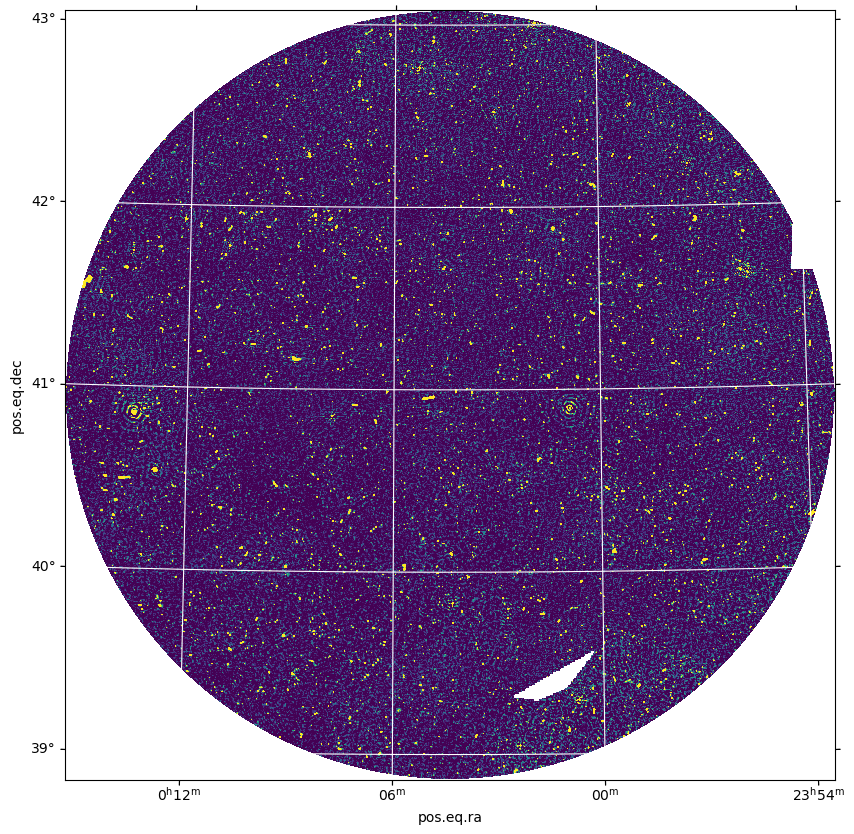

In [4]:
# plot image
image_file = ('P001d41-LOTSS-DR2-10jan24')
hdu = fits.open(image_file)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs) 
plt.imshow(hdu.data, origin='lower', vmin=0, vmax=0.0001) 
plt.grid(color='white', ls='solid')
plt.show()

In [5]:
# change the path to the folder created by PYBDSF
slist=fits.open('./P001d41-LOTSS-DR2-10jan24_pybdsf/29Jan2024_13.28.52/catalogues/P001d41-LOTSS-DR2-10jan24.pybdsf.srl.FITS')

In [6]:
#load the catalogue data
data=slist[1].data

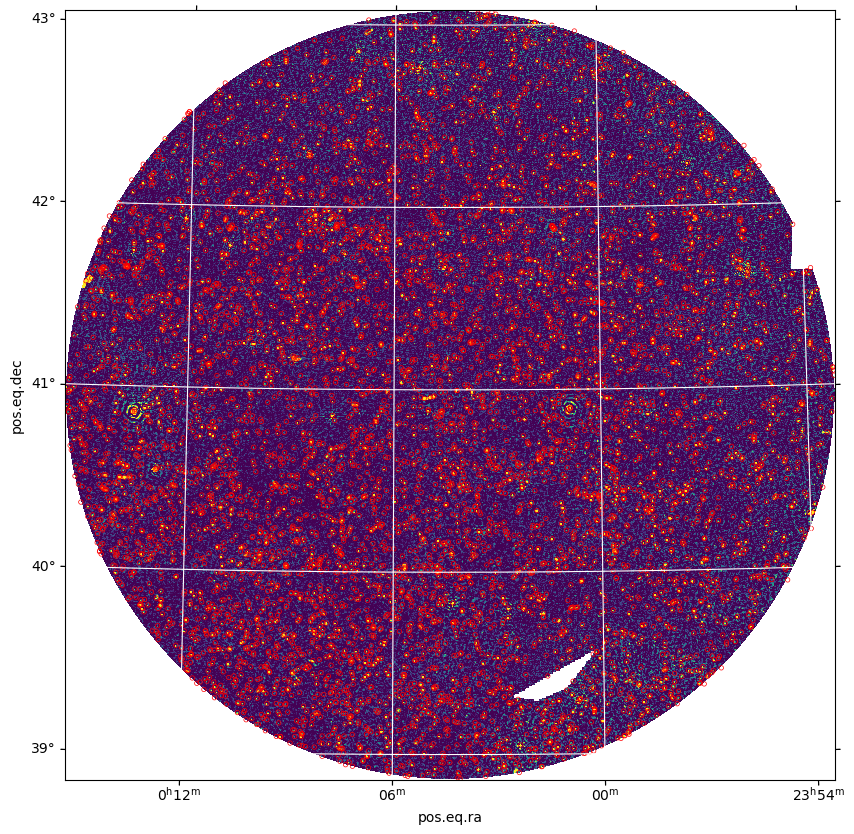

In [7]:
# plot image with source markers
image_file = ('P001d41-LOTSS-DR2-10jan24')
hdu = fits.open(image_file)[0]
wcs = WCS(hdu.header)
ax = plt.axes(projection=wcs)
ax.plot(projection=wcs) 
ax.imshow(hdu.data, origin='lower', vmin=0, vmax=0.0001) 
ax.scatter(data['RA'],data['DEC'], s=10, marker='o', facecolors='none', edgecolors='r', linewidth=0.5, transform=ax.get_transform('world'))
ax.grid(color='white', ls='solid')

(2000.0, 4000.0)

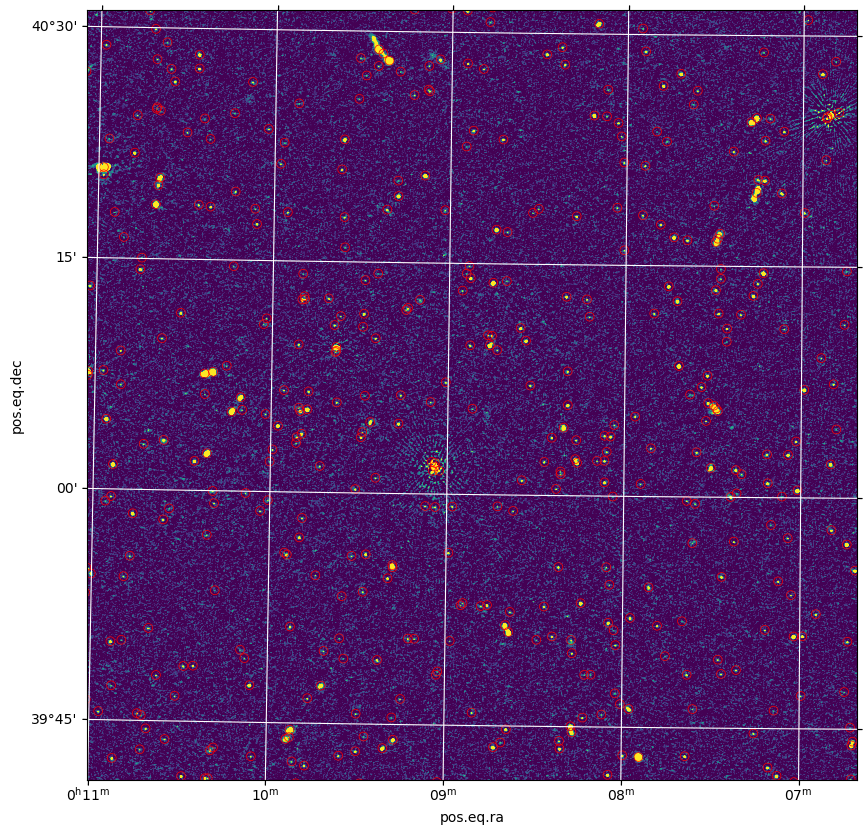

In [14]:
# plot image with source markers
image_file = ('P001d41-LOTSS-DR2-10jan24')
hdu = fits.open(image_file)[0]
wcs = WCS(hdu.header)
ax = plt.axes(projection=wcs)
ax.plot(projection=wcs) 
ax.imshow(hdu.data, origin='lower', vmin=0, vmax=0.0004) 
ax.scatter(data['RA'],data['DEC'], s=40, marker='o', facecolors='none', edgecolors='r', linewidth=0.5, transform=ax.get_transform('world'))
ax.grid(color='white', ls='solid')
plt.xlim(2000, 4000) # zoom in
plt.ylim(2000, 4000) # zoom in